# E-Commerce 데이터 분석

# 데이터 살펴보기

(데이터셋 출처) https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-electronics-store

전자 제품 회사의 이커머스 이벤트 히스토리 (캐글)
- 2019년 10월부터 2020년 2월까지 5월까지의 큰 전자제품 온라인 상점의 5달 동안의 유저 행동 데이터를 포함하고 있습니다
- 각 데이터의 행은 이벤트를 나타내며, 이벤트는 상품과 유저와 관련이 있습니다
- 각 이벤트는 상품과 유저의 many-to-many relation 와 같습니다
- 하나의 세션에는 여러개의 구매 기록이 남을 수 있지만, 1개의 주문으로 봐도 좋습니다

### 데이터 컬럼 살펴보기


- event_time: 이벤트가 일어난 시간 (UTC: 국제 표준시)
- event_type: view(상품 보기), cart(장바구니 담기), remove_from_cart(장바구니에서 제거하기), purchase (구매하기)
- product_id: 상품 ID
- category_id: 카테고리 ID
- category_code: 카테고리 코드 이름
- brand: 브랜드 이름
- price: 상품의 가격
- user_id: 유저 아이디
- user_session: 유저 세션 아이디

### 라이브러리 불러오기

In [1]:
!pip install plotly==5.5.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 44.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.3.1
    Uninstalling plotly-5.3.1:
      Successfully uninstalled plotly-5.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [2]:
# 시각화 라이브러리 import
import seaborn as sns
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.io as pio


In [3]:
#Pandas import
import pandas as pd

### 데이터 불러오기

In [4]:
# GoogleDrive Mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/DA/event_log.csv')

In [6]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


### 기본적인 데이터 살펴보기

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [8]:
df.describe()

,product_id,category_id,price,user_id
count,8.851290e+05,8.851290e+05,885129.000000,8.851290e+05
mean,1.906621e+06,2.144423e+18,146.328713,1.515916e+18
std,1.458708e+06,6.165105e+14,296.807683,3.554165e+07
min,1.020000e+02,2.144416e+18,0.220000,1.515916e+18
25%,6.988030e+05,2.144416e+18,26.460000,1.515916e+18
50%,1.452883e+06,2.144416e+18,65.710000,1.515916e+18
75%,3.721194e+06,2.144416e+18,190.490000,1.515916e+18
max,4.183880e+06,2.227847e+18,64771.060000,1.515916e+18


# 상품 분석

## 상품군의 다양성

In [9]:
# 날짜 전처리
df['event_date'] = df['event_time'].map(lambda x : x[:10])
df['event_date'] = pd.to_datetime(df['event_date'], format='%Y-%m-%d')
df = df.loc[(df['event_date'] > '2020-09-30')]
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01
...,...,...,...,...,...,...,...,...,...,...
885124,2021-02-28 23:55:01 UTC,view,953226,2144415927553229037,NaN,NaN,219.94,1515915625611023730,FRLqIttxKU,2021-02-28
885125,2021-02-28 23:58:05 UTC,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.03,1515915625611024014,g6WqPf50Ma,2021-02-28
885126,2021-02-28 23:58:09 UTC,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd,2021-02-28
885127,2021-02-28 23:58:14 UTC,view,888273,2144415921932861531,electronics.telephone,NaN,10.16,1515915625611024030,9pCbKMIcSx,2021-02-28


In [10]:
# unique한 카테고리의 개수 -> 전체 카테고리X, event가 발생한 카테고리의 개수
df['category_code'].nunique()

107

In [11]:
df_temp = df.groupby('category_code')['category_id'].count()
df_category_all = pd.DataFrame({'category_code': df_temp.index, 'count': df_temp.values}).sort_values('count', ascending=False).reset_index(drop=True)
df_category_all

,category_code,count
0,computers.components.videocards,115825
1,electronics.telephone,81435
2,computers.peripherals.printer,41603
3,stationery.cartrige,37238
4,electronics.audio.acoustic,25867
...,...,...
102,furniture.bedroom.blanket,26
103,furniture.kitchen.chair,15
104,appliances.kitchen.refrigerators,15
105,accessories.briefcase,13


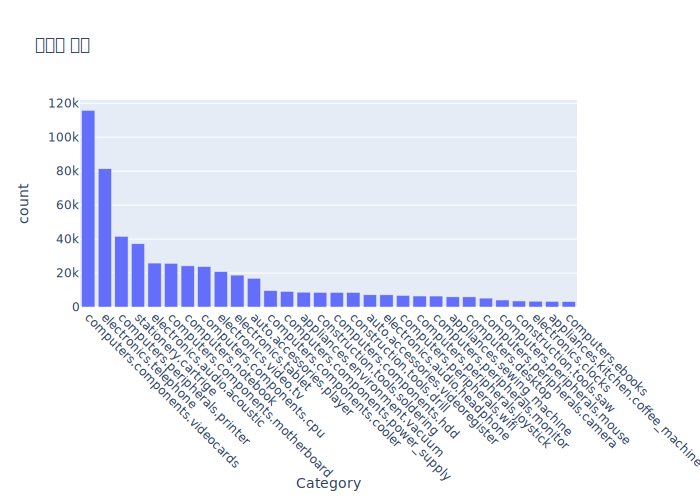

In [12]:
fig = px.bar(df_category_all.head(30), x='category_code', y='count', title='상품군 종류')
fig.update_xaxes(tickangle=45, title_text='Category')
fig.show(renderer="svg")

In [13]:
# 큰 카테고리로 분류
df['category_name'] = df['category_code'].str.split('.', n=1).str[0]
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,category_name
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,computers
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,stationery
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,NaN
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,computers
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,computers
...,...,...,...,...,...,...,...,...,...,...,...
885124,2021-02-28 23:55:01 UTC,view,953226,2144415927553229037,NaN,NaN,219.94,1515915625611023730,FRLqIttxKU,2021-02-28,NaN
885125,2021-02-28 23:58:05 UTC,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.03,1515915625611024014,g6WqPf50Ma,2021-02-28,electronics
885126,2021-02-28 23:58:09 UTC,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd,2021-02-28,electronics
885127,2021-02-28 23:58:14 UTC,view,888273,2144415921932861531,electronics.telephone,NaN,10.16,1515915625611024030,9pCbKMIcSx,2021-02-28,electronics


In [14]:
df_temp = df.groupby('category_name')['category_id'].count()
df_category = pd.DataFrame({'category_name': df_temp.index, 'count': df_temp.values}).sort_values('count', ascending=False).reset_index(drop=True)
df_category

,category_name,count
0,computers,309091
1,electronics,165443
2,stationery,41351
3,appliances,39354
4,auto,34247
5,construction,29914
6,furniture,3230
7,country_yard,3025
8,accessories,2000
9,medicine,706


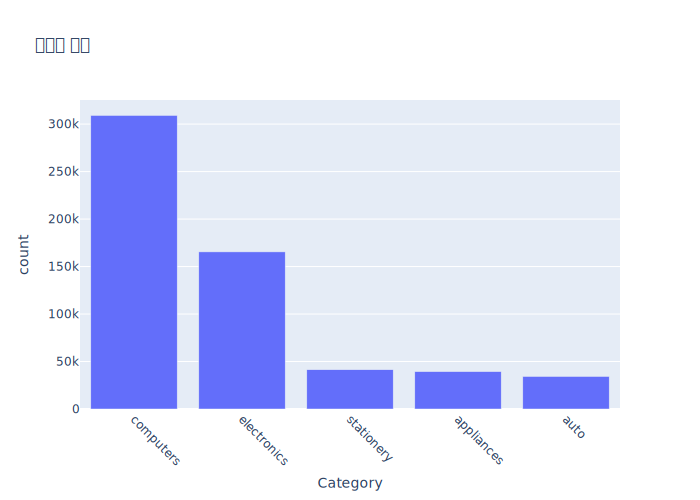

In [15]:
fig = px.bar(df_category.head(), x='category_name', y='count', title='상품군 종류')
fig.update_xaxes(tickangle=45, title_text='Category')
fig.show(renderer="svg")

## 주로 구매하는 물건

In [16]:
# event_type이 purchase인 경우만 필터링
df_order = df.loc[df['event_type'] == 'purchase']
df_order

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,category_name
28089,2020-10-01 00:16:49 UTC,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,1515915625521279407,Wxlmf9UuHZ,2020-10-01,furniture
28094,2020-10-01 00:21:18 UTC,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,1515915625521279407,Wxlmf9UuHZ,2020-10-01,furniture
28104,2020-10-01 00:31:26 UTC,purchase,1400177,2144415922528452715,electronics.telephone,NaN,19.52,1515915625521280982,EZdDgY36Lh,2020-10-01,electronics
28117,2020-10-01 00:39:19 UTC,purchase,1006569,2144415930019479855,electronics.telephone,NaN,12.70,1515915625521281502,wMoJBWUEvr,2020-10-01,electronics
28118,2020-10-01 00:39:19 UTC,purchase,1034353,2144415922528452715,electronics.telephone,NaN,28.41,1515915625521281502,wMoJBWUEvr,2020-10-01,electronics
...,...,...,...,...,...,...,...,...,...,...,...
885070,2021-02-28 23:16:45 UTC,purchase,4154620,2144415922427789416,computers.components.videocards,msi,656.63,1515915625596749373,h4fcX0qpOc,2021-02-28,computers
885078,2021-02-28 23:20:48 UTC,purchase,500058,2144415923107266682,computers.peripherals.printer,pantum,67.00,1515915625610973155,CxMKMQDRAN,2021-02-28,computers
885082,2021-02-28 23:23:11 UTC,purchase,500058,2144415923107266682,computers.peripherals.printer,pantum,67.00,1515915625610973155,CxMKMQDRAN,2021-02-28,computers
885090,2021-02-28 23:26:07 UTC,purchase,500058,2144415923107266682,computers.peripherals.printer,pantum,67.00,1515915625610973155,CxMKMQDRAN,2021-02-28,computers


In [17]:
df_order['category_code'].nunique()

92

In [18]:
df_temp = df_order.groupby('category_code')['category_id'].count()
order_category_all = pd.DataFrame({'category_code': df_temp.index, 'count': df_temp.values}).sort_values('count', ascending=False).reset_index(drop=True)
order_category_all

,category_code,count
0,computers.components.videocards,6841
1,electronics.telephone,3991
2,stationery.cartrige,2619
3,computers.peripherals.printer,2466
4,computers.notebook,1264
...,...,...
87,appliances.kitchen.coffee_grinder,2
88,construction.tools.generator,2
89,auto.accessories.immobilizer,2
90,auto.accessories.light,1


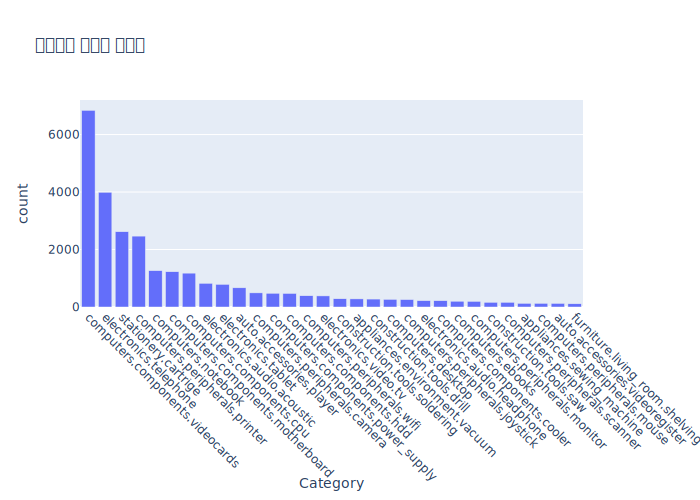

In [19]:
fig = px.bar(order_category_all.head(30), x='category_code', y='count', title='유저들이 구매한 상품군')
fig.update_xaxes(tickangle=45, title_text='Category')
fig.show(renderer="svg")

In [20]:
df_temp = df_order.groupby('category_name')['category_id'].count()
order_category = pd.DataFrame({'category_name': df_temp.index, 'count': df_temp.values}).sort_values('count', ascending=False).reset_index(drop=True)
order_category

,category_name,count
0,computers,16512
1,electronics,6564
2,stationery,2794
3,auto,1067
4,construction,982
5,appliances,878
6,furniture,112
7,accessories,55
8,country_yard,22
9,medicine,11


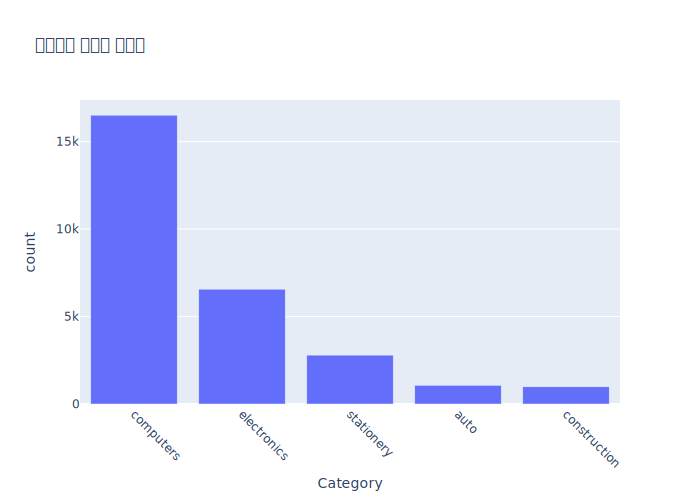

In [21]:
fig = px.bar(order_category.head(), x='category_name', y='count', title='유저들이 구매한 상품군')
fig.update_xaxes(tickangle=45, title_text='Category')
fig.show(renderer="svg")

# 지표 1. Active Users

- Active User의 기준 : 아래 중 한가지 행동을 한 유저
  - view
  - cart
  - remove_from_cart
  - purchase

## DAU

In [22]:
# 날짜 별 unique 유저 수
df_temp = df.groupby('event_date')['user_id'].nunique()
df_temp

event_date
2020-10-01    2699
2020-10-02    2559
2020-10-03    2162
2020-10-04    2398
2020-10-05    2832
              ... 
2021-02-24    2904
2021-02-25    2784
2021-02-26    2960
2021-02-27    2578
2021-02-28    2775
Name: user_id, Length: 151, dtype: int64

In [23]:
dau_data = pd.DataFrame({'event_date': df_temp.index, 'user_count': df_temp.values})
dau_data

,event_date,user_count
0,2020-10-01,2699
1,2020-10-02,2559
2,2020-10-03,2162
3,2020-10-04,2398
4,2020-10-05,2832
...,...,...
146,2021-02-24,2904
147,2021-02-25,2784
148,2021-02-26,2960
149,2021-02-27,2578


In [24]:
dau_data.describe()

,user_count
count,151.000000
mean,2984.854305
std,472.763921
min,1370.000000
25%,2683.500000
50%,2943.000000
75%,3308.500000
max,4287.000000


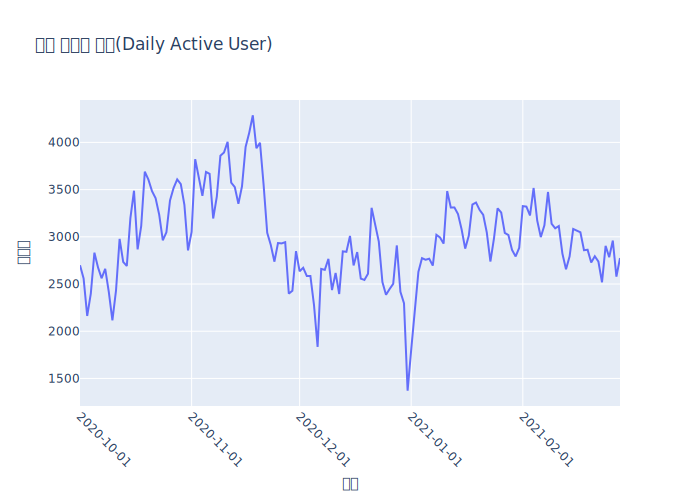

In [25]:
fig = px.line(dau_data, x='event_date', y='user_count', title='일별 유저수 변화(Daily Active User)')
fig.update_xaxes(title_text='날짜', tickangle=45, tickformat='%Y-%m-%d')
fig.update_yaxes(title_text='유저수')
fig.show(renderer="svg")


## WAU

In [26]:
# 날짜 포맷을 연도-w주차 형태로 변경
df['event_week'] = df.event_date.dt.strftime('%Y-w%U')
df['event_week']

28074     2020-w39
28075     2020-w39
28076     2020-w39
28077     2020-w39
28078     2020-w39
            ...   
885124    2021-w09
885125    2021-w09
885126    2021-w09
885127    2021-w09
885128    2021-w09
Name: event_week, Length: 857055, dtype: object

In [27]:
# 주차별 unique user 수 계산
df_temp = df.groupby('event_week')['event_date'].nunique()
df_temp

event_week
2020-w39    3
2020-w40    7
2020-w41    7
2020-w42    7
2020-w43    7
2020-w44    7
2020-w45    7
2020-w46    7
2020-w47    7
2020-w48    7
2020-w49    7
2020-w50    7
2020-w51    7
2020-w52    5
2021-w00    2
2021-w01    7
2021-w02    7
2021-w03    7
2021-w04    7
2021-w05    7
2021-w06    7
2021-w07    7
2021-w08    7
2021-w09    1
Name: event_date, dtype: int64

In [28]:
# 2020년 52주차 와 2021년 0주차를 하나의 주로 합치기
# 정확히 주차별 유저만 계산하기위해 7일이 안되는 주차 데이터 제거
df.loc[df.event_week == "2021-w00", ['event_week']] = "2020-w52"
df_week = (df.loc[(df['event_week'] != '2020-w39') & (df['event_week'] != '2021-w09'), :])

In [29]:
df_week.groupby('event_week')['event_date'].nunique()

event_week
2020-w40    7
2020-w41    7
2020-w42    7
2020-w43    7
2020-w44    7
2020-w45    7
2020-w46    7
2020-w47    7
2020-w48    7
2020-w49    7
2020-w50    7
2020-w51    7
2020-w52    7
2021-w01    7
2021-w02    7
2021-w03    7
2021-w04    7
2021-w05    7
2021-w06    7
2021-w07    7
2021-w08    7
Name: event_date, dtype: int64

In [30]:
df_temp = df_week.groupby('event_week')['user_id'].nunique()
wau_data = pd.DataFrame({'event_week': df_temp.index, 'user_count': df_temp.values})

In [31]:
wau_data.describe()

,user_count
count,21.000000
mean,19580.047619
std,2721.335122
min,14484.000000
25%,17990.000000
50%,19305.000000
75%,20821.000000
max,25600.000000


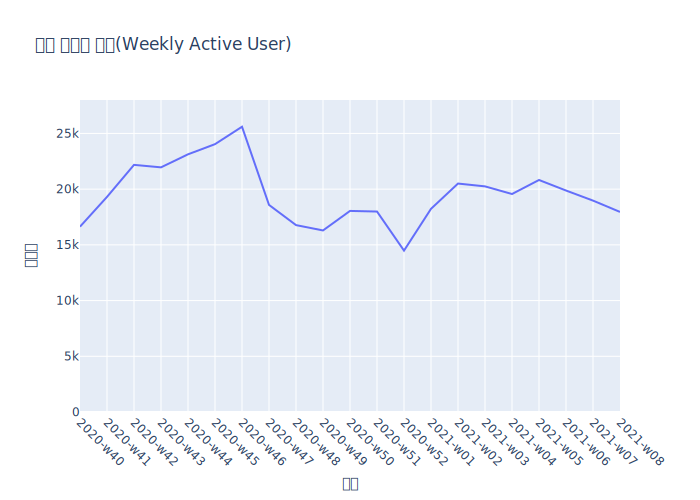

In [32]:
fig = px.line(wau_data, x='event_week', y='user_count', title='주별 유저수 변화(Weekly Active User)')
fig.update_xaxes(title_text='주차', tickangle=45, tickformat='%Y-w%U')
fig.update_yaxes(title_text='유저수', range=[0, 28000])
fig.show(renderer="svg")

## MAU

In [33]:
# event_month 컬럼 생성(연도-월)
# 월별 unique user 수 계산
df['event_month'] = df['event_time'].map(lambda x : x[:7])
df_temp = df.groupby('event_month')['user_id'].nunique()
mau_data = pd.DataFrame({'event_month': df_temp.index, 'user_count': df_temp.values})

In [34]:
mau_data.describe()

,user_count
count,5.000000
mean,80963.000000
std,8130.149937
min,72137.000000
25%,74606.000000
50%,81256.000000
75%,84216.000000
max,92600.000000


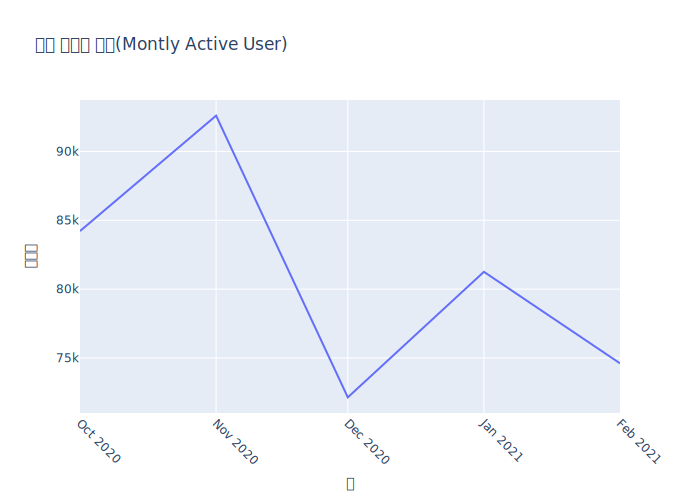

In [35]:
fig = px.line(mau_data, x='event_month', y='user_count', title='월별 유저수 변화(Montly Active User)')
fig.update_xaxes(title_text='월', tickangle=45, dtick='M1')
fig.update_yaxes(title_text='유저수')
fig.show(renderer="svg")

## DAU / MAU

한 유저가 1달에 얼마나 자주 들어오는지 판단할 수 있는 지표

In [36]:
avg_daily_user = dau_data.user_count.mean()
avg_monthly_user = mau_data.user_count.mean()

dau_mau_ratio = avg_daily_user / avg_monthly_user
print(f'DAU = {round(avg_daily_user)}')
print(f'MAU = {round(avg_monthly_user)}')
print(f"DAU / MAU = {round(dau_mau_ratio * 100, 2)}%")

DAU = 2985
MAU = 80963
DAU / MAU = 3.69%


# 지표 2.유저수와 세션수

In [37]:
# 날짜별 unique user수 계산
df_session = (
    df.loc[:, ['user_id', 'user_session', 'event_time', 'event_date']]
    .groupby('event_date')
    .agg(['nunique', 'count'])
)

In [38]:
df_agg = df_session.sort_values('event_date')
df_agg

user_id       user_session       event_time      
           nunique count      nunique count    nunique count
event_date                                                  
2020-10-01    2699  4657         2847  4654       4500  4657
2020-10-02    2559  4555         2728  4554       4397  4555
2020-10-03    2162  3774         2271  3774       3666  3774
2020-10-04    2398  4413         2529  4413       4231  4413
2020-10-05    2832  4982         3002  4981       4790  4982
...            ...   ...          ...   ...        ...   ...
2021-02-24    2904  5803         3250  5803       5527  5803
2021-02-25    2784  5647         3113  5647       5386  5647
2021-02-26    2960  5864         3268  5864       5594  5864
2021-02-27    2578  4933         2846  4933       4736  4933
2021-02-28    2775  5268         3054  5268       5059  5268

[151 rows x 6 columns]

In [39]:
# 일별 유저수, 세션수, 이벤트수
df_user_session = pd.DataFrame(
    {
        'user_count': df_agg[('user_id', 'nunique')],         # 유저 수
        'session_count': df_agg[('user_session', 'nunique')], # 세션 수
        'event_count': df_agg[('event_time', 'count')]        # 이벤트 수
    }
)
df_user_session

,user_count,session_count,event_count
event_date,,,
2020-10-01,2699,2847,4657
2020-10-02,2559,2728,4555
2020-10-03,2162,2271,3774
2020-10-04,2398,2529,4413
2020-10-05,2832,3002,4982
...,...,...,...
2021-02-24,2904,3250,5803
2021-02-25,2784,3113,5647
2021-02-26,2960,3268,5864


In [40]:
# 유저 별 일일 세션 수
df_user_session['session_per_user'] = df_user_session['session_count'] / df_user_session['user_count']

# 세션 별 이벤트 수
df_user_session['clicks_per_session'] = df_user_session['event_count'] / df_user_session['session_count']

In [41]:
df_user_session

,user_count,session_count,event_count,session_per_user,clicks_per_session
event_date,,,,,
2020-10-01,2699,2847,4657,1.054835,1.635757
2020-10-02,2559,2728,4555,1.066041,1.669721
2020-10-03,2162,2271,3774,1.050416,1.661823
2020-10-04,2398,2529,4413,1.054629,1.744958
2020-10-05,2832,3002,4982,1.060028,1.659560
...,...,...,...,...,...
2021-02-24,2904,3250,5803,1.119146,1.785538
2021-02-25,2784,3113,5647,1.118175,1.814006
2021-02-26,2960,3268,5864,1.104054,1.794370


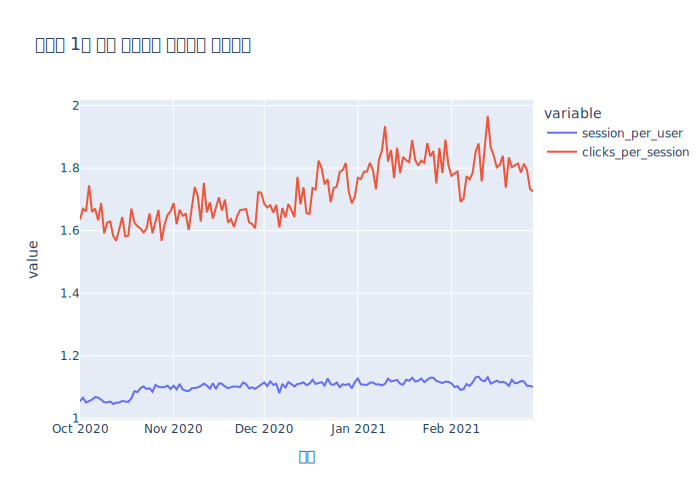

In [42]:
fig = px.line(df_user_session, x=df_user_session.index, y=['session_per_user', 'clicks_per_session'], title='유저별 1일 평균 방문수와 방문대비 이벤트수')
fig.update_xaxes(title_text='일자')
fig.show(renderer="svg")

# 지표 3.코호트 분석


## 재구매율

In [43]:
df_order.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,category_name
28089,2020-10-01 00:16:49 UTC,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,1515915625521279407,Wxlmf9UuHZ,2020-10-01,furniture
28094,2020-10-01 00:21:18 UTC,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,1515915625521279407,Wxlmf9UuHZ,2020-10-01,furniture
28104,2020-10-01 00:31:26 UTC,purchase,1400177,2144415922528452715,electronics.telephone,NaN,19.52,1515915625521280982,EZdDgY36Lh,2020-10-01,electronics
28117,2020-10-01 00:39:19 UTC,purchase,1006569,2144415930019479855,electronics.telephone,NaN,12.70,1515915625521281502,wMoJBWUEvr,2020-10-01,electronics
28118,2020-10-01 00:39:19 UTC,purchase,1034353,2144415922528452715,electronics.telephone,NaN,28.41,1515915625521281502,wMoJBWUEvr,2020-10-01,electronics


In [44]:
df_order['order_month'] = df_order['event_time'].map(lambda x : x[:7])

<ipython-input-44-02b14530ff7d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
df_order

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,category_name,order_month
28089,2020-10-01 00:16:49 UTC,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,1515915625521279407,Wxlmf9UuHZ,2020-10-01,furniture,2020-10
28094,2020-10-01 00:21:18 UTC,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,1515915625521279407,Wxlmf9UuHZ,2020-10-01,furniture,2020-10
28104,2020-10-01 00:31:26 UTC,purchase,1400177,2144415922528452715,electronics.telephone,NaN,19.52,1515915625521280982,EZdDgY36Lh,2020-10-01,electronics,2020-10
28117,2020-10-01 00:39:19 UTC,purchase,1006569,2144415930019479855,electronics.telephone,NaN,12.70,1515915625521281502,wMoJBWUEvr,2020-10-01,electronics,2020-10
28118,2020-10-01 00:39:19 UTC,purchase,1034353,2144415922528452715,electronics.telephone,NaN,28.41,1515915625521281502,wMoJBWUEvr,2020-10-01,electronics,2020-10
...,...,...,...,...,...,...,...,...,...,...,...,...
885070,2021-02-28 23:16:45 UTC,purchase,4154620,2144415922427789416,computers.components.videocards,msi,656.63,1515915625596749373,h4fcX0qpOc,2021-02-28,computers,2021-02
885078,2021-02-28 23:20:48 UTC,purchase,500058,2144415923107266682,computers.peripherals.printer,pantum,67.00,1515915625610973155,CxMKMQDRAN,2021-02-28,computers,2021-02
885082,2021-02-28 23:23:11 UTC,purchase,500058,2144415923107266682,computers.peripherals.printer,pantum,67.00,1515915625610973155,CxMKMQDRAN,2021-02-28,computers,2021-02
885090,2021-02-28 23:26:07 UTC,purchase,500058,2144415923107266682,computers.peripherals.printer,pantum,67.00,1515915625610973155,CxMKMQDRAN,2021-02-28,computers,2021-02


In [46]:
df_order.set_index('user_id', inplace=True)
df_order.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_session,event_date,category_name,order_month
user_id,,,,,,,,,,,
1515915625521279407,2020-10-01 00:16:49 UTC,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,Wxlmf9UuHZ,2020-10-01,furniture,2020-10
1515915625521279407,2020-10-01 00:21:18 UTC,purchase,455054,2144415938886238754,furniture.living_room.shelving,NaN,27.30,Wxlmf9UuHZ,2020-10-01,furniture,2020-10
1515915625521280982,2020-10-01 00:31:26 UTC,purchase,1400177,2144415922528452715,electronics.telephone,NaN,19.52,EZdDgY36Lh,2020-10-01,electronics,2020-10
1515915625521281502,2020-10-01 00:39:19 UTC,purchase,1006569,2144415930019479855,electronics.telephone,NaN,12.70,wMoJBWUEvr,2020-10-01,electronics,2020-10
1515915625521281502,2020-10-01 00:39:19 UTC,purchase,1034353,2144415922528452715,electronics.telephone,NaN,28.41,wMoJBWUEvr,2020-10-01,electronics,2020-10


In [47]:
# 유저 별 첫 구매월
first_order = df_order.groupby(df_order.index)['order_month'].min()
first_order.head()

user_id
1515915625353286099    2020-10
1515915625353534622    2020-10
1515915625353561691    2020-11
1515915625353900095    2020-10
1515915625354561351    2020-10
Name: order_month, dtype: object

In [48]:
df_order = df_order.merge(
    first_order.rename('first_order_month').to_frame(),
    left_index=True,
    right_index=True
)
df_order.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_session,event_date,category_name,order_month,first_order_month
user_id,,,,,,,,,,,,
1515915625353286099,2020-10-03 11:23:44 UTC,purchase,1023383,2144415922016747613,computers.peripherals.wifi,zyxel,119.03,p5I1h2vk1T,2020-10-03,computers,2020-10,2020-10
1515915625353534622,2020-10-06 10:01:55 UTC,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,electronics,2020-10,2020-10
1515915625353534622,2020-10-06 10:03:42 UTC,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,electronics,2020-10,2020-10
1515915625353534622,2020-10-06 10:29:25 UTC,purchase,1428321,2144415941352489571,electronics.tablet,samsung,19.05,mNGo9YKWcw,2020-10-06,electronics,2020-10,2020-10
1515915625353561691,2020-11-24 17:37:22 UTC,purchase,1507368,2144415922016747613,computers.peripherals.wifi,keenetic,172.86,UmL0qYoQh4,2020-11-24,computers,2020-11,2020-11


In [49]:
df_order.reset_index(inplace=True)
order_group = df_order.groupby(['first_order_month', 'order_month'])

# 첫 구매월 별 이후 구매건수 변화
cohorts_order = order_group['user_id'].nunique()
cohorts_order.head(50)

first_order_month  order_month
2020-10            2020-10        3796
                   2020-11          67
                   2020-12          17
                   2021-01           4
                   2021-02           4
2020-11            2020-11        4261
                   2020-12          68
                   2021-01          26
                   2021-02           7
2020-12            2020-12        3784
                   2021-01          68
                   2021-02          21
2021-01            2021-01        4673
                   2021-02         117
2021-02            2021-02        4192
Name: user_id, dtype: int64

In [50]:
cohorts_order = cohorts_order.reset_index()
cohorts_order.head()

,first_order_month,order_month,user_id
0,2020-10,2020-10,3796
1,2020-10,2020-11,67
2,2020-10,2020-12,17
3,2020-10,2021-01,4
4,2020-10,2021-02,4


In [51]:
cohorts_order.rename({'user_id':'total_users'}, axis=1, inplace=True)
cohorts_order.head()

,first_order_month,order_month,total_users
0,2020-10,2020-10,3796
1,2020-10,2020-11,67
2,2020-10,2020-12,17
3,2020-10,2021-01,4
4,2020-10,2021-02,4


In [52]:
cohorts_order['first_order_month'].value_counts().sort_index()

2020-10    5
2020-11    4
2020-12    3
2021-01    2
2021-02    1
Name: first_order_month, dtype: int64

In [53]:
cohorts_order.first_order_month.dtypes

dtype('O')

In [54]:
cohorts_order['first_order_month'] = pd.to_datetime(cohorts_order.first_order_month, format='%Y-%m')
cohorts_order['order_month'] = pd.to_datetime(cohorts_order.order_month, format='%Y-%m')

In [55]:
cohorts_order.first_order_month.dtypes

dtype('<M8[ns]')

In [56]:
# 코호트 분석을 위해 to_period 함수를 사용 후 첫 구매월과 구매월의 차이 계산
cohorts_order['month_diff'] = (
    cohorts_order.order_month.dt.to_period('M').astype(int)
    - cohorts_order.first_order_month.dt.to_period('M').astype(int)
)

In [57]:
cohorts_order['first_order_month'] = cohorts_order['first_order_month'].dt.strftime('%Y-%m')
cohorts_order['order_month'] = cohorts_order['order_month'].dt.strftime('%Y-%m')

In [58]:
cohorts_order.head()

,first_order_month,order_month,total_users,month_diff
0,2020-10,2020-10,3796,0
1,2020-10,2020-11,67,1
2,2020-10,2020-12,17,2
3,2020-10,2021-01,4,3
4,2020-10,2021-02,4,4


In [59]:
cohorts_order.set_index(['first_order_month', 'month_diff'], inplace=True)
cohorts_order.head()

order_month  total_users
first_order_month month_diff                         
2020-10           0              2020-10         3796
                  1              2020-11           67
                  2              2020-12           17
                  3              2021-01            4
                  4              2021-02            4

In [60]:
cohorts_order = cohorts_order['total_users'].unstack(1)
cohorts_order

month_diff,0,1,2,3,4
first_order_month,,,,,
2020-10,3796.0,67.0,17.0,4.0,4.0
2020-11,4261.0,68.0,26.0,7.0,NaN
2020-12,3784.0,68.0,21.0,NaN,NaN
2021-01,4673.0,117.0,NaN,NaN,NaN
2021-02,4192.0,NaN,NaN,NaN,NaN


In [61]:
# 재구매율로 표현
reorder_rate = cohorts_order.divide(cohorts_order[0], axis=0)
reorder_rate = reorder_rate.iloc[:, 1:]
reorder_rate

month_diff,1,2,3,4
first_order_month,,,,
2020-10,0.017650,0.004478,0.001054,0.001054
2020-11,0.015959,0.006102,0.001643,NaN
2020-12,0.017970,0.005550,NaN,NaN
2021-01,0.025037,NaN,NaN,NaN
2021-02,NaN,NaN,NaN,NaN


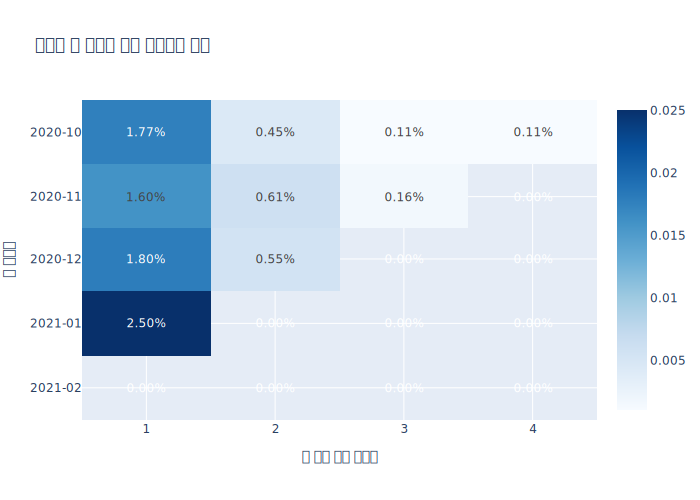

In [62]:
fig = px.imshow(reorder_rate, text_auto='.2%', color_continuous_scale='Blues', title='유저의 첫 구매월 이후 재구매율 변화')
fig.update_xaxes(title_text='첫 구매 이후 개월수', dtick=1)
fig.update_yaxes(title_text='첫 구매월', tickformat='%Y-%m')
fig.show(renderer="svg")

## 재방문율

In [63]:
# 어떤 이벤트라도 발생했다면 방문으로 정의
visit_data = df[['event_time', 'user_id', 'user_session', 'event_month']]
visit_data.set_index('user_id', inplace=True)
visit_data.head()

,event_time,user_session,event_month
user_id,,,
1515915625520113390,2020-10-01 00:01:36 UTC,4X2NwIInsI,2020-10
1515915625521278799,2020-10-01 00:04:11 UTC,daM8ubpOfo,2020-10
1515915625521278938,2020-10-01 00:07:23 UTC,EdgYsorbdC,2020-10
1515915625520113390,2020-10-01 00:07:56 UTC,4X2NwIInsI,2020-10
1515915625521279091,2020-10-01 00:08:11 UTC,Et4GWStGMB,2020-10


In [64]:
first_visit = visit_data.groupby(visit_data.index)['event_month'].min()
visit_data = visit_data.merge(
    first_visit.rename('first_visit_month').to_frame(),
    left_index=True,
    right_index=True
)
visit_data.reset_index(inplace=True)

In [65]:
visit_group = visit_data.groupby(['first_visit_month', 'event_month'])

In [66]:
cohorts_visit = visit_group['user_id'].nunique()
cohorts_visit.head(10)

first_visit_month  event_month
2020-10            2020-10        84216
                   2020-11         2387
                   2020-12          758
                   2021-01          504
                   2021-02          322
2020-11            2020-11        90213
                   2020-12         1879
                   2021-01          798
                   2021-02          557
2020-12            2020-12        69500
Name: user_id, dtype: int64

In [67]:
cohorts_visit = cohorts_visit.reset_index()
cohorts_visit.rename({'user_id': 'total_users'}, axis=1, inplace=True)
cohorts_visit['first_visit_month'].value_counts().sort_index()

2020-10    5
2020-11    4
2020-12    3
2021-01    2
2021-02    1
Name: first_visit_month, dtype: int64

In [68]:
cohorts_visit['first_visit_month'] = pd.to_datetime(cohorts_visit.first_visit_month, format='%Y-%m')
cohorts_visit['event_month'] = pd.to_datetime(cohorts_visit.event_month, format='%Y-%m')

cohorts_visit['month_diff'] = (
    cohorts_visit.event_month.dt.to_period('M').astype(int)
    - cohorts_visit.first_visit_month.dt.to_period('M').astype(int)
)

cohorts_visit['first_visit_month'] = cohorts_visit['first_visit_month'].dt.strftime('%Y-%m')
cohorts_visit['event_month'] = cohorts_visit['event_month'].dt.strftime('%Y-%m')

cohorts_visit.set_index(['first_visit_month', 'month_diff'], inplace=True)
cohorts_visit = cohorts_visit['total_users'].unstack(1)

In [69]:
# 재방문율로 표현
revisit_rate = cohorts_visit.divide(cohorts_visit[0], axis=0)
revisit_rate = revisit_rate.iloc[:, 1:]
revisit_rate

month_diff,1,2,3,4
first_visit_month,,,,
2020-10,0.028344,0.009001,0.005985,0.003824
2020-11,0.020828,0.008846,0.006174,NaN
2020-12,0.023712,0.010302,NaN,NaN
2021-01,0.027661,NaN,NaN,NaN
2021-02,NaN,NaN,NaN,NaN


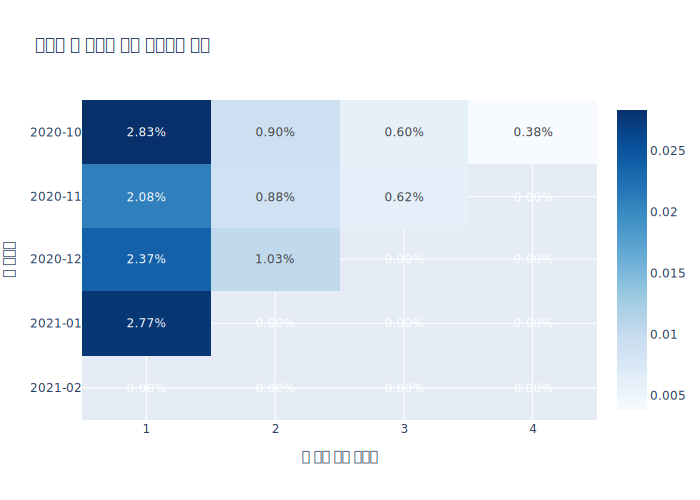

In [70]:
fig = px.imshow(revisit_rate, text_auto='.2%', color_continuous_scale='Blues', title='유저의 첫 방문월 이후 재방문율 변화')
fig.update_xaxes(title_text='첫 방문 이후 개월수', dtick=1)
fig.update_yaxes(title_text='첫 방문월', tickformat='%Y-%m')
fig.show(renderer="svg")

# Funnel

In [71]:
df_temp = df.groupby('event_type')['user_id'].count()
df_event = pd.DataFrame({'event_type': df_temp.index, 'count': df_temp.values}).sort_values('count', ascending=False).reset_index(drop=True)
df_event

,event_type,count
0,view,768093
1,cart,52623
2,purchase,36339


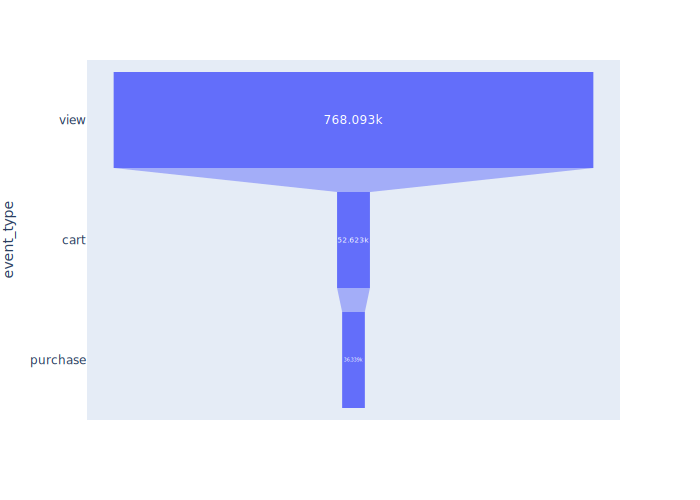

In [72]:
fig = px.funnel(df_event, x='count', y='event_type')
fig.show(renderer="svg")

# 간단한 데이터 분석 보고서

노션 보고서 https://bejewled-individual-1a5.notion.site/be3afdee86134948b35e4c13033a8b1a